<a href="https://colab.research.google.com/github/T-Sawao/diveintocode-ml3/blob/main/term2_sprint17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# term2_sprint17 公開されている実装を動かす

### 0.1.1 （準備）　**Tensorflow2.2.0のインポート**

python 3.7.x
keras 2.2.x
tensorflow 1系：1.14.x、2系：2.0

In [1]:
!pip install keras==2.2.4

In [2]:
!pip install tensorflow==1.14.0

In [3]:
import tensorflow

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [4]:
tensorflow.__version__

'1.14.0'

### 0.1.2 （準備）　**kaggleとMyドライブの接続と、データセットのダウンロード**

In [5]:
# kaggleインポート
!pip install kaggle

In [6]:
# 自分のマイドライブにマウントする
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [7]:
mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


In [8]:
ls -a

./  ../  .config/  drive/  .kaggle/  sample_data/


kaggle.jsonファイルのダウンロード  
※JSON (JavaScript Object Notation)は、軽量のデータ交換フォーマット

In [10]:
# https://www.kaggle.com/　へアクセスし、ログイン後に右上のプロフィール画像をクリック、さらに"My Account"をクリックする
# このサイトの「API」項目にある"Create New API Token"をクリックすると、kaggle.jsonファイルが自動的にダウンロードされる
# ローカルで、kaggle.json（ダウンロードフォルダにあるはず）をエディターで開く。
# このセルの以下のコードにある token = {'username':'***','key':'***'} における「***」部分を、
# ダウンロードしたkaggle.jsonを参照して書き換え、このセルを実行する

import json

token = {"username":"toshihirosawao","key":"f57d7a0bbe0ad850c3f9e03332f544f2"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [14]:
# chmodはファイル or ディレクトリに対する権限を設定するコマンド。
# 形式：chmod 権限設定　ファイルパス
!chmod 600 /content/.kaggle/kaggle.json
      #--------
      # kaggleの権限設定は、kaggleの"My Account" 内のAPIにあるRead the docsから移動した、
      # kaggle-api内のAPI credentialsに「chmod 600 ~/.kaggle/kaggle.json」と記載あり。

In [19]:
# kaggle.jsonフォルダをroot/.kaggle内にコピー
!cp -R /content/.kaggle/kaggle.json /root/.kaggle/

In [20]:
!ls -a /root/.kaggle/

.  ..  kaggle.json


In [21]:
# kaggle APIコマンドが使えるかどうかを確認
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         93           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        196           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        344           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2452           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      18872           False  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       5040            True  
connectx

In [22]:
# カレントディレクトリの変更

import os

os.chdir('/content/drive/My Drive/')

# カレントディレクトリの取得
print(os.getcwd())

/content/drive/My Drive


In [23]:
# simpsonデータセットのAPIコマンドでデータセットをダウンロードする
# APIコマンドはこちらのサイトを参照。https://www.kaggle.com/alexattia/the-simpsons-characters-dataset

!kaggle datasets download -d alexattia/the-simpsons-characters-dataset --force

 99% 1.07G/1.08G [00:10<00:00, 119MB/s]
100% 1.08G/1.08G [00:10<00:00, 106MB/s]


In [24]:
# # Simpsonsデータセットのダウンロード 
!unzip /content/drive/'My Drive'/the-simpsons-characters-dataset.zip  -d Simpsons

ストリーミング出力は最後の 5000 行に切り捨てられました。
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1270.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1271.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1272.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1273.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1274.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1275.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1276.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1277.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1278.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1279.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1280.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset

### 0.1.3 （準備）　**github上のコードをダウンロード**

In [25]:
!git clone https://github.com/duckrabbits/ObjectDetection.git

Cloning into 'ObjectDetection'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 49 (delta 4), reused 9 (delta 2), pack-reused 28
Unpacking objects: 100% (49/49), done.


In [26]:
# https://github.com/duckrabbits/ObjectDetection/tree/master
# この後、上述のgithubのreadmeに沿って、simpsons_datasetフォルダをプロジェクトフォルダ配下に格納しましょう。
# testデータなども同様に準備してみよう。

In [38]:
cd ObjectDetection

[Errno 2] No such file or directory: 'ObjectDetection'
/content/drive/My Drive/ObjectDetection


In [44]:
mv ../Simpsons/simpsons_dataset simpsons_dataset

In [40]:
mv ../Simpsons/annotation.txt annotation.txt

# 1.このSprintについて

**Sprintの目的**  
公開されている実装を動かす際のノウハウを得る
論文で読んだ手法を動かしてみる

**どのように学ぶか**  
論文で読んだ手法の公開されている実装を実際に動かしていきます。

# 2.Faster R-CNN

Faster R-CNN[1]の実装を動かします。


[1]Ren, S., He, K., Girshick, R., Sun, J.: Faster r-cnn: Towards real-time object detection with region proposal networks. In: Advances in neural information processing systems. (2015) 91–99


https://arxiv.org/pdf/1506.01497.pdf  
https://arxiv.org/pdf/1506.01497.pdf

以下のものを使用してください。Kerasを使用した実装です。


duckrabbits/ObjectDetection at master  
https://github.com/duckrabbits/ObjectDetection/tree/master

## 【問題1】学習と推定
READMEを参考に上記実装を動かしてください。

### 1.1.1（学習）

In [48]:
!python train.py -p annotation.txt

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

### 1.1.2（解答）推定_画像の座標表記は12時間程度の推定時間が掛かるため不可

In [49]:
!python predict.py -i /content/drive/MyDrive/keras-yolo3/simpsons_dataset -c ./save/train_20210106-092031_config.pickle

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

## 【問題2】コードリーディング
上記実装のコードリーディングを行ってください。


まず、Faster R-CNN[1]において重要だと考えた部分を列挙してください。そして、それに対応するコードを見つけてください。


（例）


- RPNを実現しているコードはどこか
- RoIプーリングを実現しているコードはどこか

フレームワークには畳み込み層など一般的なものはクラスが用意されていますが、RoIプーリングなど特定の手法限定のものは用意されていません。オリジナルのレイヤーを作成することが可能であり、Kerasであれば以下のページに情報がまとまっています。


オリジナルのKerasレイヤーを作成する - Keras Documentation  
https://keras.io/ja/layers/writing-your-own-keras-layers/



**《参考》**


KerasではVGG16のクラスが用意されているため、簡単に利用ができます。include_top=Falseの引数を与えることで、出力のための全結合層部分が除かれます。weights='imagenet'でImageNetを利用した学習済みモデルも手に入り、転移学習 が行えます。weights='None'とすればランダムな初期化となります。


Applications - Keras Documentation  
https://keras.io/ja/applications/#vgg16

### 2.1.1（解答） RPNを実現しているコードはどこか　　
modelのresnet.py内のｒｐｎメソッドで行っている。

### 2.2.1（解答） RoIプーリングを実現しているコードはどこか　　
RoiPoolingConv.py内のcallメソッドで行っている。



# 3.YOLOv3

シンプソンズのデータセットをFaster R-CNN以外の手法で学習・推定を行います。YOLOv3[2]のKeras実装を使います。


qqwweee/keras-yolo3: A Keras implementation of YOLOv3 (Tensorflow backend)  
https://github.com/qqwweee/keras-yolo3


[2]Jeseph Redmon, Ali Farhadi. YOLOv3: An Incremental Improvement


https://pjreddie.com/media/files/papers/YOLOv3.pdf  

## 【問題3】学習済みの重みによる推定
学習済みの重みを使い推定を行う方法がREADME.mdのQuick Startの項に記載されています。


まずはこの通りにして各自何かしらの画像や動画に対して検出を行ってください。


出力結果を課題の一部として提出してください。

In [50]:
import os
os.chdir('/content/drive/My Drive')
print(os.getcwd())

/content/drive/My Drive


In [51]:
# keras-YOLOをクローン
!git clone https://github.com/qqwweee/keras-yolo3.git

fatal: destination path 'keras-yolo3' already exists and is not an empty directory.


In [52]:
cd keras-yolo3/

/content/drive/MyDrive/keras-yolo3


In [53]:
pwd

'/content/drive/MyDrive/keras-yolo3'

In [54]:
# yolov3weightのダウンロード（学習済みの重み）
!wget https://pjreddie.com/media/files/yolov3.weights

--2021-01-06 09:40:43--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   149KB/s    in 30m 1s  

2021-01-06 10:10:45 (134 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [55]:
# 事前学習済みの重みをロード
!python convert.py yolov3.cfg yolov3.weights model_data/yolo.h5

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [56]:
!python yolo_video.py --image

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

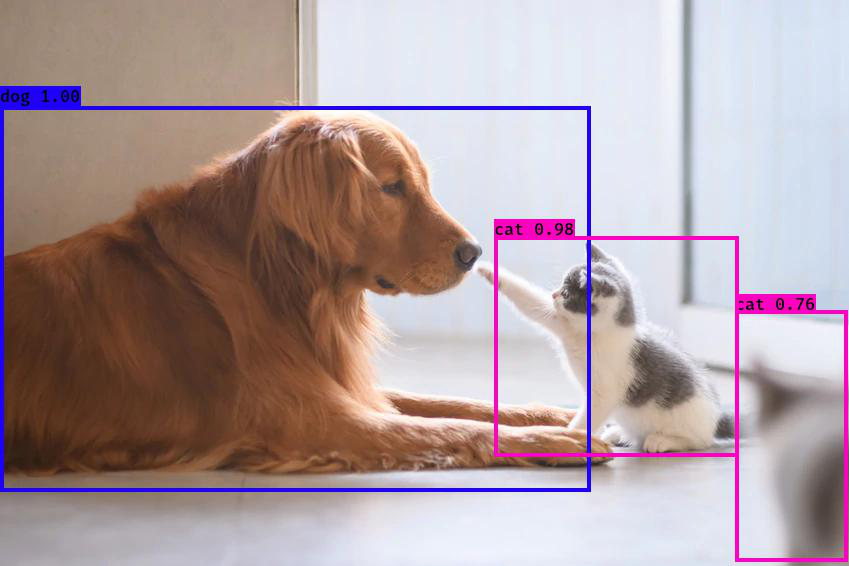

In [57]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

im = Image.open('/content/drive/MyDrive/keras-yolo3/save/test_dog.jpg')
im

## 【問題4】学習のためのファイルを作成
新しいデータ（シンプソンズデータセット）を学習します。README.mdのTrainingの項を読み、シンプソンズデータセットを学習するために必要なファイルを作成してください。


アノテーションファイルの形式が問題1の実装とは異なるため変換する必要があります。

4.1.1（解答）annotationファイルの作成

In [59]:
# ファイルの所在　　model_data/annotation.txt

# ファイルの中身
# /content/drive/MyDrive/keras-yolo3/simpsons_dataset/pic_0000.jpg, 57,72,52,72,0
# /content/drive/MyDrive/keras-yolo3/simpsons_dataset/pic_0001.jpg, 80,31,337,354,0
# /content/drive/MyDrive/keras-yolo3/simpsons_dataset/pic_0002.jpg, 128,48,285,407,0
# /content/drive/MyDrive/keras-yolo3/simpsons_dataset/pic_0003.jpg, 72,126,158,275,0
# /content/drive/MyDrive/keras-yolo3/simpsons_dataset/pic_0004.jpg, 123,61,294,416,0

In [60]:
# ファイルの所在　model_data/simpsons_classes.txt

# ファイルの中身
#　grampa_simpson

上記の２つのファイルを作成、またtrain.pyの設定も２つのファイルパスに変更

## 【問題5】学習が行えることの確認
問題4で作成したファイルを使用して学習してください。実行環境で学習に時間がかかる場合は、学習が行えることを確認するのみで終えて構いません。

In [61]:
!python convert.py -w yolov3.cfg yolov3.weights model_data/yolo_weights.h5
# !python convert.py -w yolov3.cfg simpsons.weights model_data/simpsons.weights.h5

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [62]:
!python train.py

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [63]:
!python yolo_video.py --image

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

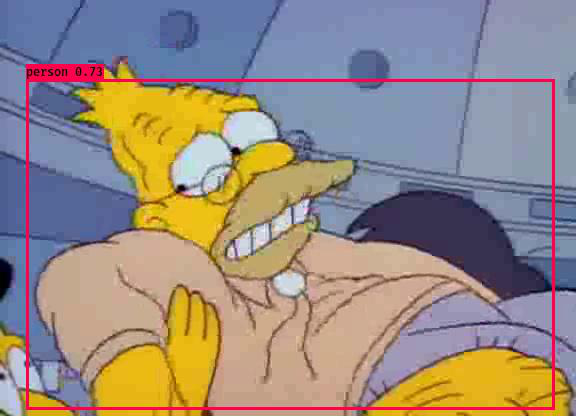

In [64]:
im = Image.open('/content/drive/MyDrive/keras-yolo3/save/test_dog.jpg')
im